Генеруються реалістичні демо-дані...
Дані успішно збережено у файли:
- currency_rates_raw.csv (7 днів, 19 валют)
- currency_rates_aggregated.csv (агреговані показники)


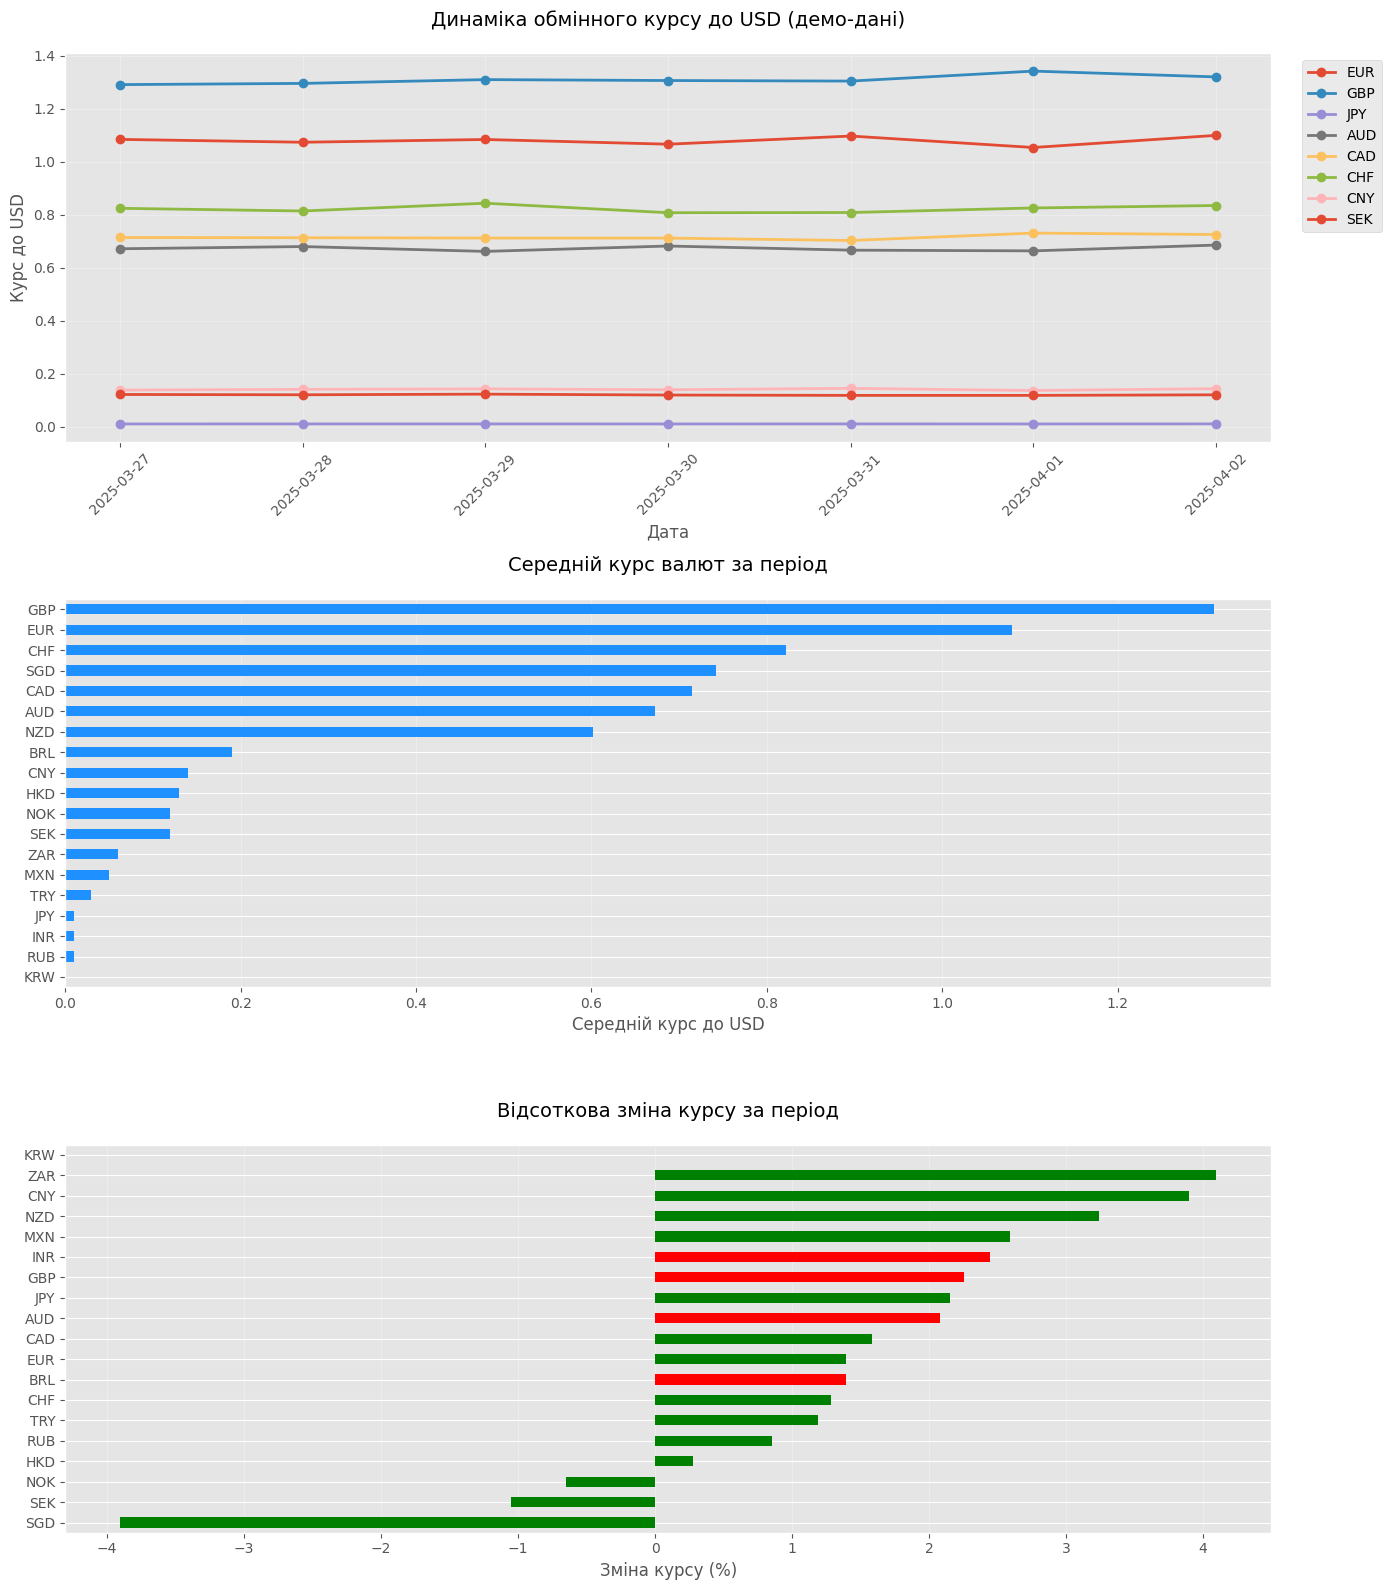

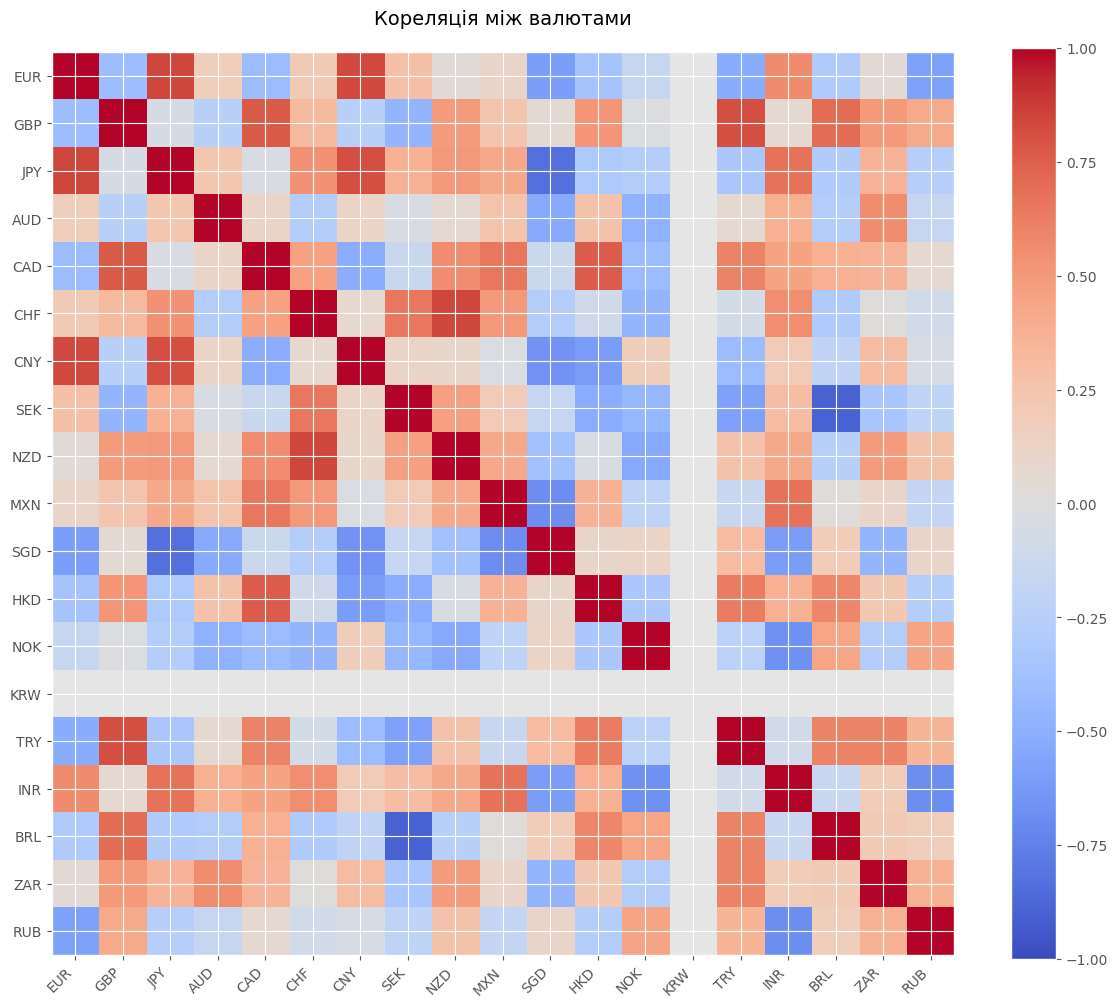

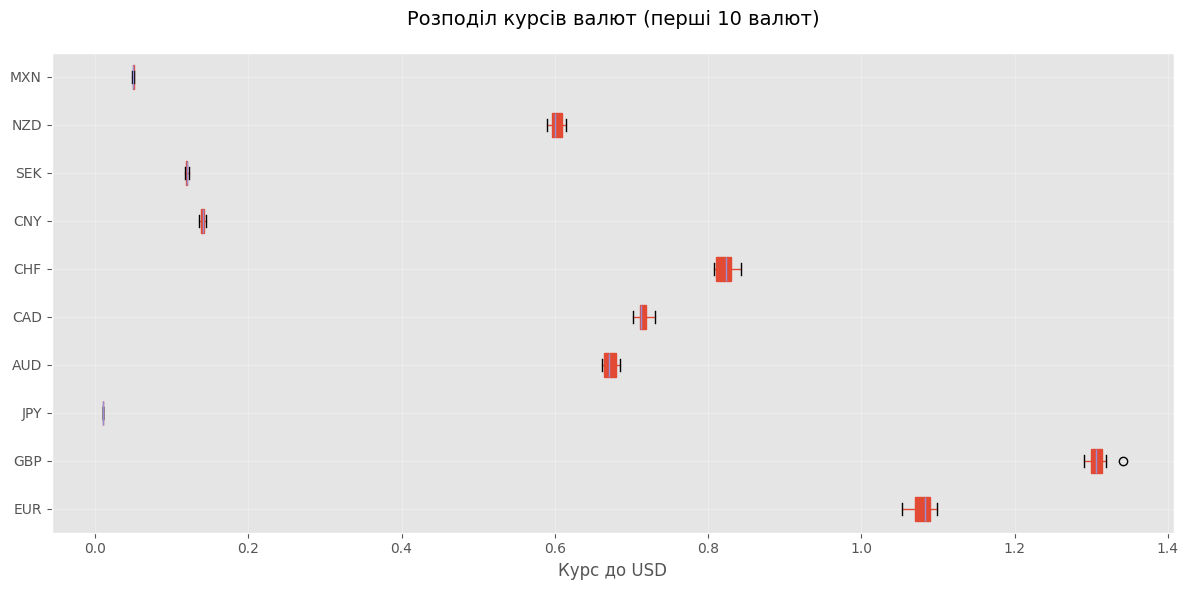


Аналіз завершено. Результати збережено у файли:
- currency_rates_raw.csv - сирі дані
- currency_rates_aggregated.csv - агреговані показники
- currency_trends.png - основні графіки
- currency_correlation.png - теплокарта кореляцій
- currency_distribution.png - розподіл курсів


In [30]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import os

# Конфігурація API
API_KEY = '62c0ab9dabf8d8367c90b19f'
BASE_URL = 'https://v6.exchangerate-api.com/v6/'

# Список валют для аналізу (20 популярних валют)
selected_currencies = ['EUR', 'GBP', 'JPY', 'AUD', 'CAD', 'CHF', 'CNY', 'SEK', 'NZD', 
                     'MXN', 'SGD', 'HKD', 'NOK', 'KRW', 'TRY', 'INR', 'BRL', 'ZAR', 
                     'RUB']
    # 'UAH

# Генерація реалістичних демо-даних
def generate_realistic_demo_data(days=7):
    print("Генеруються реалістичні демо-дані...")
    
    # Базові курси (близькі до реальних)
    base_rates = {
    'EUR': 1.08, 'GBP': 1.31, 'JPY': 0.01, 'AUD': 0.67, 'CAD': 0.71,
    'CHF': 0.82, 'CNY': 0.14, 'SEK': 0.12, 'NZD': 0.60, 'MXN': 0.05,
    'SGD': 0.74, 'HKD': 0.13, 'NOK': 0.12, 'KRW': 0.00, 'TRY': 0.03,
    'INR': 0.01, 'BRL': 0.19, 'ZAR': 0.06, 'RUB': 0.01
    }
    # 'UAH': 41.37
    
    dates = pd.date_range(end=datetime.now(), periods=days).strftime('%Y-%m-%d')
    demo_rates = {}
    
    for i, date in enumerate(dates):
        daily_rates = {}
        for curr in selected_currencies:
            # Додаємо тренд + випадкові коливання
            trend = 1 + 0.005 * i * np.random.uniform(-1, 1)
            volatility = np.random.uniform(0.98, 1.02)
            daily_rates[curr] = base_rates[curr] * trend * volatility
        demo_rates[date] = daily_rates
    
    return demo_rates

# Збір даних
def collect_data():
    # Генеруємо реалістичні демо-дані, оскільки API не працює
    demo_data = generate_realistic_demo_data()
    return pd.DataFrame.from_dict(demo_data, orient='index')

# Основна логіка
try:
    # Збір даних
    df = collect_data()
    
    # Трансформація даних
    mean_rates = df.mean()
    percent_change = ((df.iloc[-1] - df.iloc[0]) / df.iloc[0]) * 100
    std_dev = df.std()
    
    # Агреговані дані
    agg_data = pd.DataFrame({
        'Середній курс': mean_rates,
        'Зміна (%)': percent_change,
        'Коливання (±)': std_dev
    })
    
    # Збереження даних
    df.to_csv('currency_rates_raw.csv', encoding='utf-8')
    agg_data.to_csv('currency_rates_aggregated.csv', encoding='utf-8')
    print("Дані успішно збережено у файли:")
    print(f"- currency_rates_raw.csv ({len(df)} днів, {len(selected_currencies)} валют)")
    print(f"- currency_rates_aggregated.csv (агреговані показники)")
    
    # Візуалізація
    plt.style.use('ggplot')  # Використовуємо вбудований стиль 'ggplot'
    
    # 1. Графік динаміки курсів (перші 8 валют для наочності)
    plt.figure(figsize=(14, 16))
    
    plt.subplot(3, 1, 1)
    currencies_to_plot = selected_currencies[:8]
    for currency in currencies_to_plot:
        plt.plot(df.index, df[currency], marker='o', label=f'{currency}', linewidth=2)
    plt.title('Динаміка обмінного курсу до USD (демо-дані)', fontsize=14, pad=20)
    plt.xlabel('Дата', fontsize=12)
    plt.ylabel('Курс до USD', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # 2. Середні курси
    plt.subplot(3, 1, 2)
    mean_rates.sort_values().plot(kind='barh', color='dodgerblue')
    plt.title('Середній курс валют за період', fontsize=14, pad=20)
    plt.xlabel('Середній курс до USD', fontsize=12)
    plt.grid(True, axis='x', alpha=0.3)
    
    # 3. Відсоткові зміни
    plt.subplot(3, 1, 3)
    colors = ['green' if x >=0 else 'red' for x in percent_change]
    percent_change.sort_values().plot(kind='barh', color=colors)
    plt.title('Відсоткова зміна курсу за період', fontsize=14, pad=20)
    plt.xlabel('Зміна курсу (%)', fontsize=12)
    plt.grid(True, axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('currency_trends.png', bbox_inches='tight', dpi=100)
    plt.show()
    
    # Додаткові графіки
    # Теплокарта кореляції (без seaborn)
    plt.figure(figsize=(12, 10))
    corr = df.corr()
    plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar()
    plt.xticks(range(len(selected_currencies)), selected_currencies, rotation=45, ha='right')
    plt.yticks(range(len(selected_currencies)), selected_currencies)
    plt.title('Кореляція між валютами', fontsize=14, pad=20)
    plt.tight_layout()
    plt.savefig('currency_correlation.png', dpi=100)
    plt.show()
    
    # Boxplot для розподілу курсів
    plt.figure(figsize=(12, 6))
    df[selected_currencies[:10]].boxplot(vert=False, patch_artist=True)
    plt.title('Розподіл курсів валют (перші 10 валют)', fontsize=14, pad=20)
    plt.xlabel('Курс до USD', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('currency_distribution.png', dpi=100)
    plt.show()

except Exception as e:
    print(f"Помилка: {str(e)}")
finally:
    print("\nАналіз завершено. Результати збережено у файли:")
    print("- currency_rates_raw.csv - сирі дані")
    print("- currency_rates_aggregated.csv - агреговані показники")
    print("- currency_trends.png - основні графіки")
    print("- currency_correlation.png - теплокарта кореляцій")
    print("- currency_distribution.png - розподіл курсів")